<img src="https://imgur.com/3Ua9VYU.png" style="float: left; margin: 18px; height: 75px"> 

# Exploratory Data Analysis & Data Visualizations
---

## NBA Game Total Score Prediction
---
## Problem Statement
With the unpredictability in sports, there is never be an sure-fire winning sportsbet.
The goal of this project is to create a model that returns the expected totals of upcoming NBA matchups and comparing that to Over/Under bets from different sportsbooks, recommending whether the total will fall within the over or under line and by how much. Ultimately giving players somewhat of an analysis and upperhand when betting on sportsbooks. To create the expected value for the total of the game, we will be implementing machine learning models on previous NBA game data. Choosing the model with the best testing score.
---

### Importing Libraries & Data
---

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [109]:
team1=pd.read_csv('../data/team1data.csv')
team2=pd.read_csv('../data/team2data.csv')

---
### Exploratory Data Analysis & Visualizations
---

In [110]:
#basic info
team1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Columns: 122 entries, date_game to last8sum_opp_tov
dtypes: float64(120), int64(1), object(1)
memory usage: 70.7+ KB


In [111]:
#basic info
team2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Columns: 122 entries, date_game to last8sum_opp_tov
dtypes: float64(120), int64(1), object(1)
memory usage: 70.7+ KB


In [112]:
#shape row,column
team1.shape

(74, 122)

In [113]:
#shape row,column
team2.shape

(74, 122)

In [114]:
# There are 74 rows of data with 122 columns in each team data 

In [115]:
#null values
team1.isna().sum()

date_game           0
pts                 0
last1sum_pts        0
last1sum_fg         0
last1sum_fga        0
                   ..
last8sum_opp_trb    0
last8sum_opp_ast    0
last8sum_opp_stl    0
last8sum_opp_blk    0
last8sum_opp_tov    0
Length: 122, dtype: int64

In [116]:
#null values
team2.isna().sum()

date_game           0
pts                 0
last1sum_pts        0
last1sum_fg         0
last1sum_fga        0
                   ..
last8sum_opp_trb    0
last8sum_opp_ast    0
last8sum_opp_stl    0
last8sum_opp_blk    0
last8sum_opp_tov    0
Length: 122, dtype: int64

In [117]:
# There are no null values

In [118]:
#summary stats
team1.describe()

,pts,last1sum_pts,last1sum_fg,last1sum_fga,last1sum_fg_pct,last1sum_fg3,last1sum_fg3a,last1sum_fg3_pct,last1sum_ft,last1sum_fta,...,last8sum_opp_fg3a,last8sum_opp_fg3_pct,last8sum_opp_ft,last8sum_opp_fta,last8sum_opp_ft_pct,last8sum_opp_trb,last8sum_opp_ast,last8sum_opp_stl,last8sum_opp_blk,last8sum_opp_tov
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,104.270270,104.135135,38.310811,88.500000,0.433486,11.878378,36.472973,0.324919,15.635135,19.797297,...,287.689189,2.929838,141.094595,182.108108,6.167662,377.500000,197.040541,63.391892,41.891892,102.081081
std,10.969818,10.770742,4.663838,6.491828,0.048252,3.230644,5.772450,0.071763,4.830197,5.642257,...,22.038525,0.227584,18.871715,20.193969,0.243318,16.182394,14.803220,8.431542,7.434771,9.290969
min,79.000000,79.000000,27.000000,72.000000,0.321000,4.000000,25.000000,0.121000,6.000000,7.000000,...,237.000000,2.366000,105.000000,135.000000,5.618000,331.000000,155.000000,44.000000,30.000000,76.000000
25%,96.000000,96.000000,35.000000,84.000000,0.398500,10.000000,32.250000,0.283000,12.000000,16.000000,...,271.250000,2.789000,129.000000,170.000000,6.047000,369.250000,188.000000,59.000000,37.000000,95.250000
50%,105.000000,105.000000,38.000000,89.000000,0.432500,11.500000,36.000000,0.322000,16.000000,20.000000,...,293.500000,2.964000,140.500000,185.000000,6.204000,377.000000,199.000000,63.000000,41.000000,102.000000
75%,112.500000,112.500000,42.000000,93.000000,0.468000,14.000000,40.000000,0.365500,19.750000,24.000000,...,304.750000,3.071750,154.000000,195.000000,6.309750,387.000000,207.000000,69.000000,44.000000,110.500000
max,130.000000,130.000000,48.000000,106.000000,0.543000,19.000000,51.000000,0.514000,25.000000,30.000000,...,320.000000,3.459000,185.000000,223.000000,6.697000,416.000000,221.000000,83.000000,62.000000,120.000000


In [119]:
#summary stats
team2.describe()

,pts,last1sum_pts,last1sum_fg,last1sum_fga,last1sum_fg_pct,last1sum_fg3,last1sum_fg3a,last1sum_fg3_pct,last1sum_ft,last1sum_fta,...,last8sum_opp_fg3a,last8sum_opp_fg3_pct,last8sum_opp_ft,last8sum_opp_fta,last8sum_opp_ft_pct,last8sum_opp_trb,last8sum_opp_ast,last8sum_opp_stl,last8sum_opp_blk,last8sum_opp_tov
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,114.594595,114.297297,41.418919,87.959459,0.472203,13.013514,34.797297,0.372068,18.445946,22.716216,...,281.324324,2.945068,126.067568,159.013514,6.363703,350.635135,206.000000,56.986486,36.108108,96.716216
std,12.318734,12.206813,4.748487,6.323341,0.055361,3.620691,5.482175,0.081462,5.507509,6.650822,...,24.061626,0.226001,14.578396,17.853662,0.303492,11.778288,12.393105,7.272567,5.708843,10.655914
min,87.000000,87.000000,31.000000,68.000000,0.355000,5.000000,24.000000,0.179000,6.000000,10.000000,...,236.000000,2.460000,91.000000,122.000000,5.756000,328.000000,183.000000,37.000000,25.000000,75.000000
25%,108.000000,108.000000,38.000000,84.000000,0.435250,11.000000,31.000000,0.316250,15.000000,18.250000,...,266.250000,2.812000,115.250000,145.000000,6.138250,342.250000,198.250000,55.000000,32.250000,90.000000
50%,116.000000,115.000000,42.000000,88.000000,0.466500,13.000000,35.000000,0.376500,18.000000,22.000000,...,277.000000,2.944500,128.000000,162.000000,6.306500,349.500000,206.000000,58.000000,36.500000,96.500000
75%,123.500000,122.000000,44.750000,92.000000,0.511750,15.000000,38.000000,0.424000,21.750000,27.000000,...,298.500000,3.058000,137.000000,170.000000,6.621000,356.750000,215.000000,63.000000,40.750000,103.000000
max,136.000000,136.000000,52.000000,109.000000,0.584000,25.000000,49.000000,0.545000,37.000000,49.000000,...,333.000000,3.459000,158.000000,194.000000,6.900000,386.000000,233.000000,67.000000,48.000000,121.000000


In [120]:
# Count is always 74 as there are 74 rows of data. There are 82 games in an NBA season per team but since we utilizinged the rolling sum, there is going to be 8 less rows.

#### Data Visuals 

##### Team 1 (home)
---

''

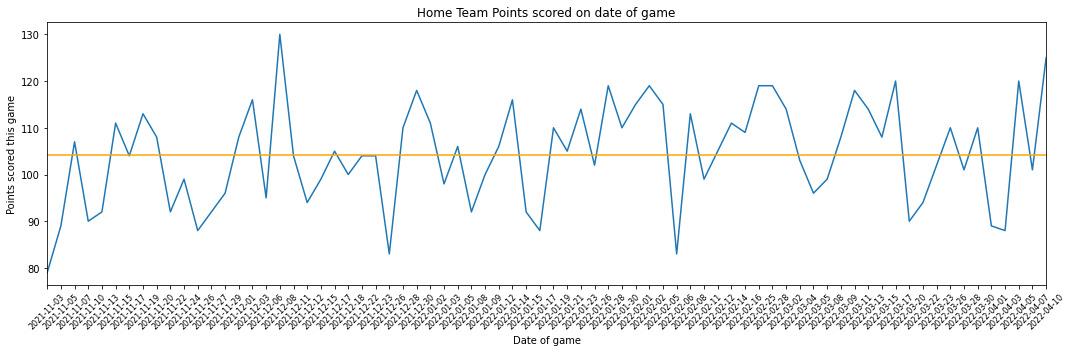

In [121]:
#line graph of points scored
plt.figure(figsize = (15, 5))
plt.plot(team1['date_game'],team1['pts'])
plt.axhline(team1['pts'].mean(),color='orange')
plt.xticks(fontsize=8,rotation=45);
plt.title('Home Team Points scored on date of game')
plt.xlim(team1['date_game'].index[-1],team1['date_game'].index[0])
plt.xlabel('Date of game')
plt.ylabel('Points scored this game')

plt.tight_layout()
plt.savefig('../data_visuals/team1_points_scored_date_game.jpg');
;

In [122]:
#top 10 points scored
team1[['date_game','pts']].sort_values(by='pts',ascending=False)[:10]

,date_game,pts
56,2021-12-08,130
0,2022-04-10,125
2,2022-04-05,120
11,2022-03-17,120
32,2022-01-28,119
29,2022-02-02,119
21,2022-02-25,119
20,2022-02-28,119
46,2021-12-30,118
14,2022-03-11,118


In [123]:
#lowest 10 points scored
team1[['date_game','pts']].sort_values(by='pts',ascending=True)[:10]

,date_game,pts
73,2021-11-03,79
27,2022-02-06,83
48,2021-12-26,83
3,2022-04-03,88
37,2022-01-17,88
62,2021-11-26,88
4,2022-04-01,89
72,2021-11-05,89
70,2021-11-10,90
10,2022-03-20,90


''

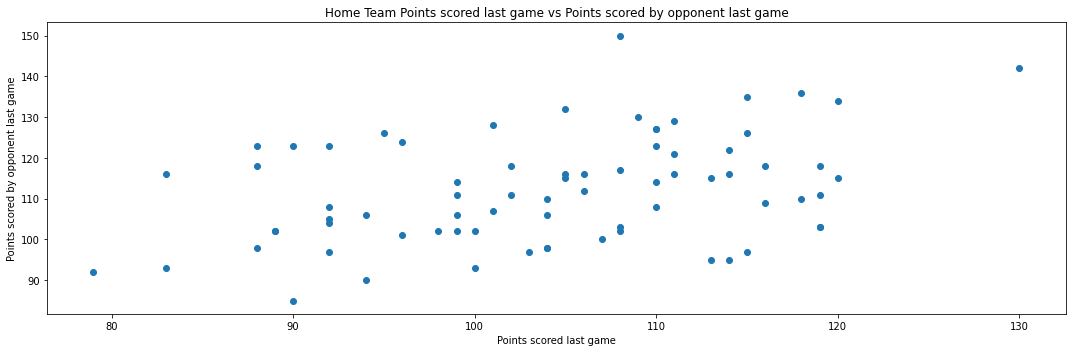

In [124]:
#scatter plot of points last game vs opponents points last game
plt.figure(figsize = (15, 5))
plt.scatter(team1['last1sum_pts'],team1['last1sum_opp_pts'])
plt.title('Home Team Points scored last game vs Points scored by opponent last game')
plt.xlabel('Points scored last game')
plt.ylabel('Points scored by opponent last game')

plt.tight_layout()
plt.savefig('../data_visuals/team1_last_game_points_vs_opponent_points.jpg');
;

''

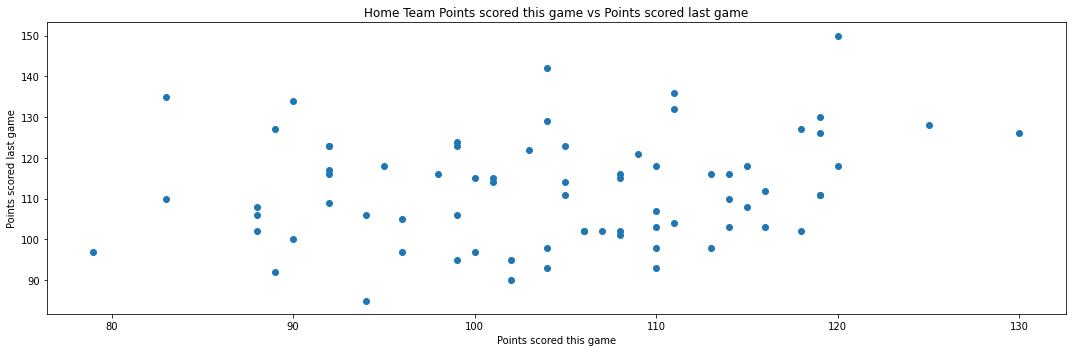

In [125]:
#scatter plot of points this game vs opponents points last game
plt.figure(figsize = (15, 5))
plt.scatter(team1['pts'],team1['last1sum_opp_pts'])
plt.title('Home Team Points scored this game vs Points scored last game')
plt.xlabel('Points scored this game')
plt.ylabel('Points scored last game')

plt.tight_layout()
plt.savefig('../data_visuals/team1_points_scored_vs_last_game_points.jpg');
;

''

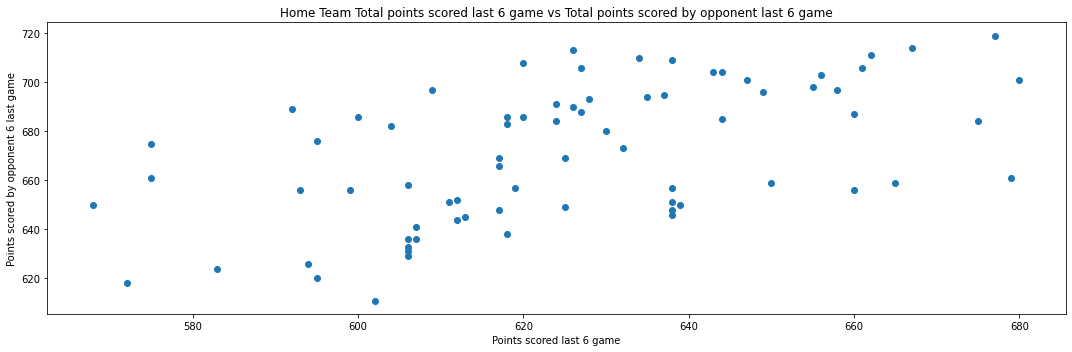

In [126]:
#scatter plot of total points vs total opponents points last 6 game
plt.figure(figsize = (15, 5))
plt.scatter(team1['last6sum_pts'],team1['last6sum_opp_pts'])
plt.title('Home Team Total points scored last 6 game vs Total points scored by opponent last 6 game')
plt.xlabel('Points scored last 6 game')
plt.ylabel('Points scored by opponent 6 last game')

plt.tight_layout()
plt.savefig('../data_visuals/team1_last_6_games_points_vs_opponent_points.jpg');
;

''

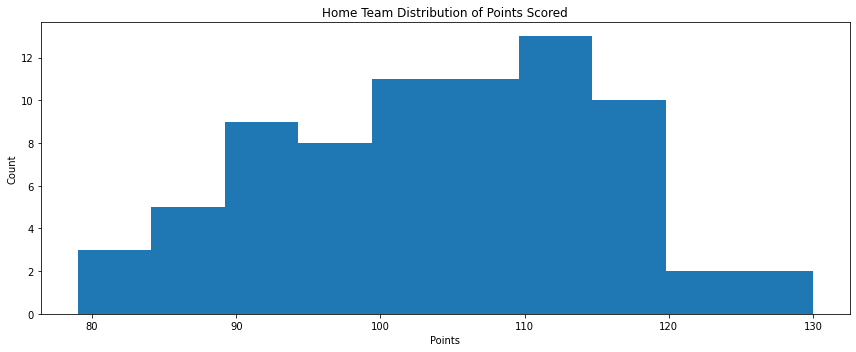

In [127]:
#histogram of points scored
plt.figure(figsize=(12,5))
plt.hist(team1['pts'])
plt.title('Home Team Distribution of Points Scored')
plt.xlabel('Points')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../data_visuals/team1_points_scored_distribution.jpg');
;

''

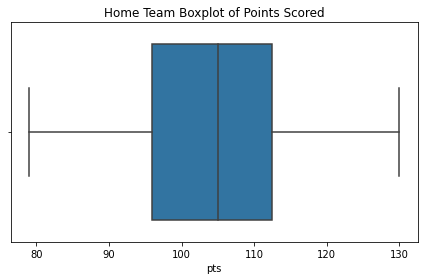

In [128]:
#boxplot of points scored
sns.boxplot(data=team1['pts'],x=team1['pts']).set(title='Home Team Boxplot of Points Scored')

plt.tight_layout()
plt.savefig('../data_visuals/team1_points_scored_boxplot.jpg');
;

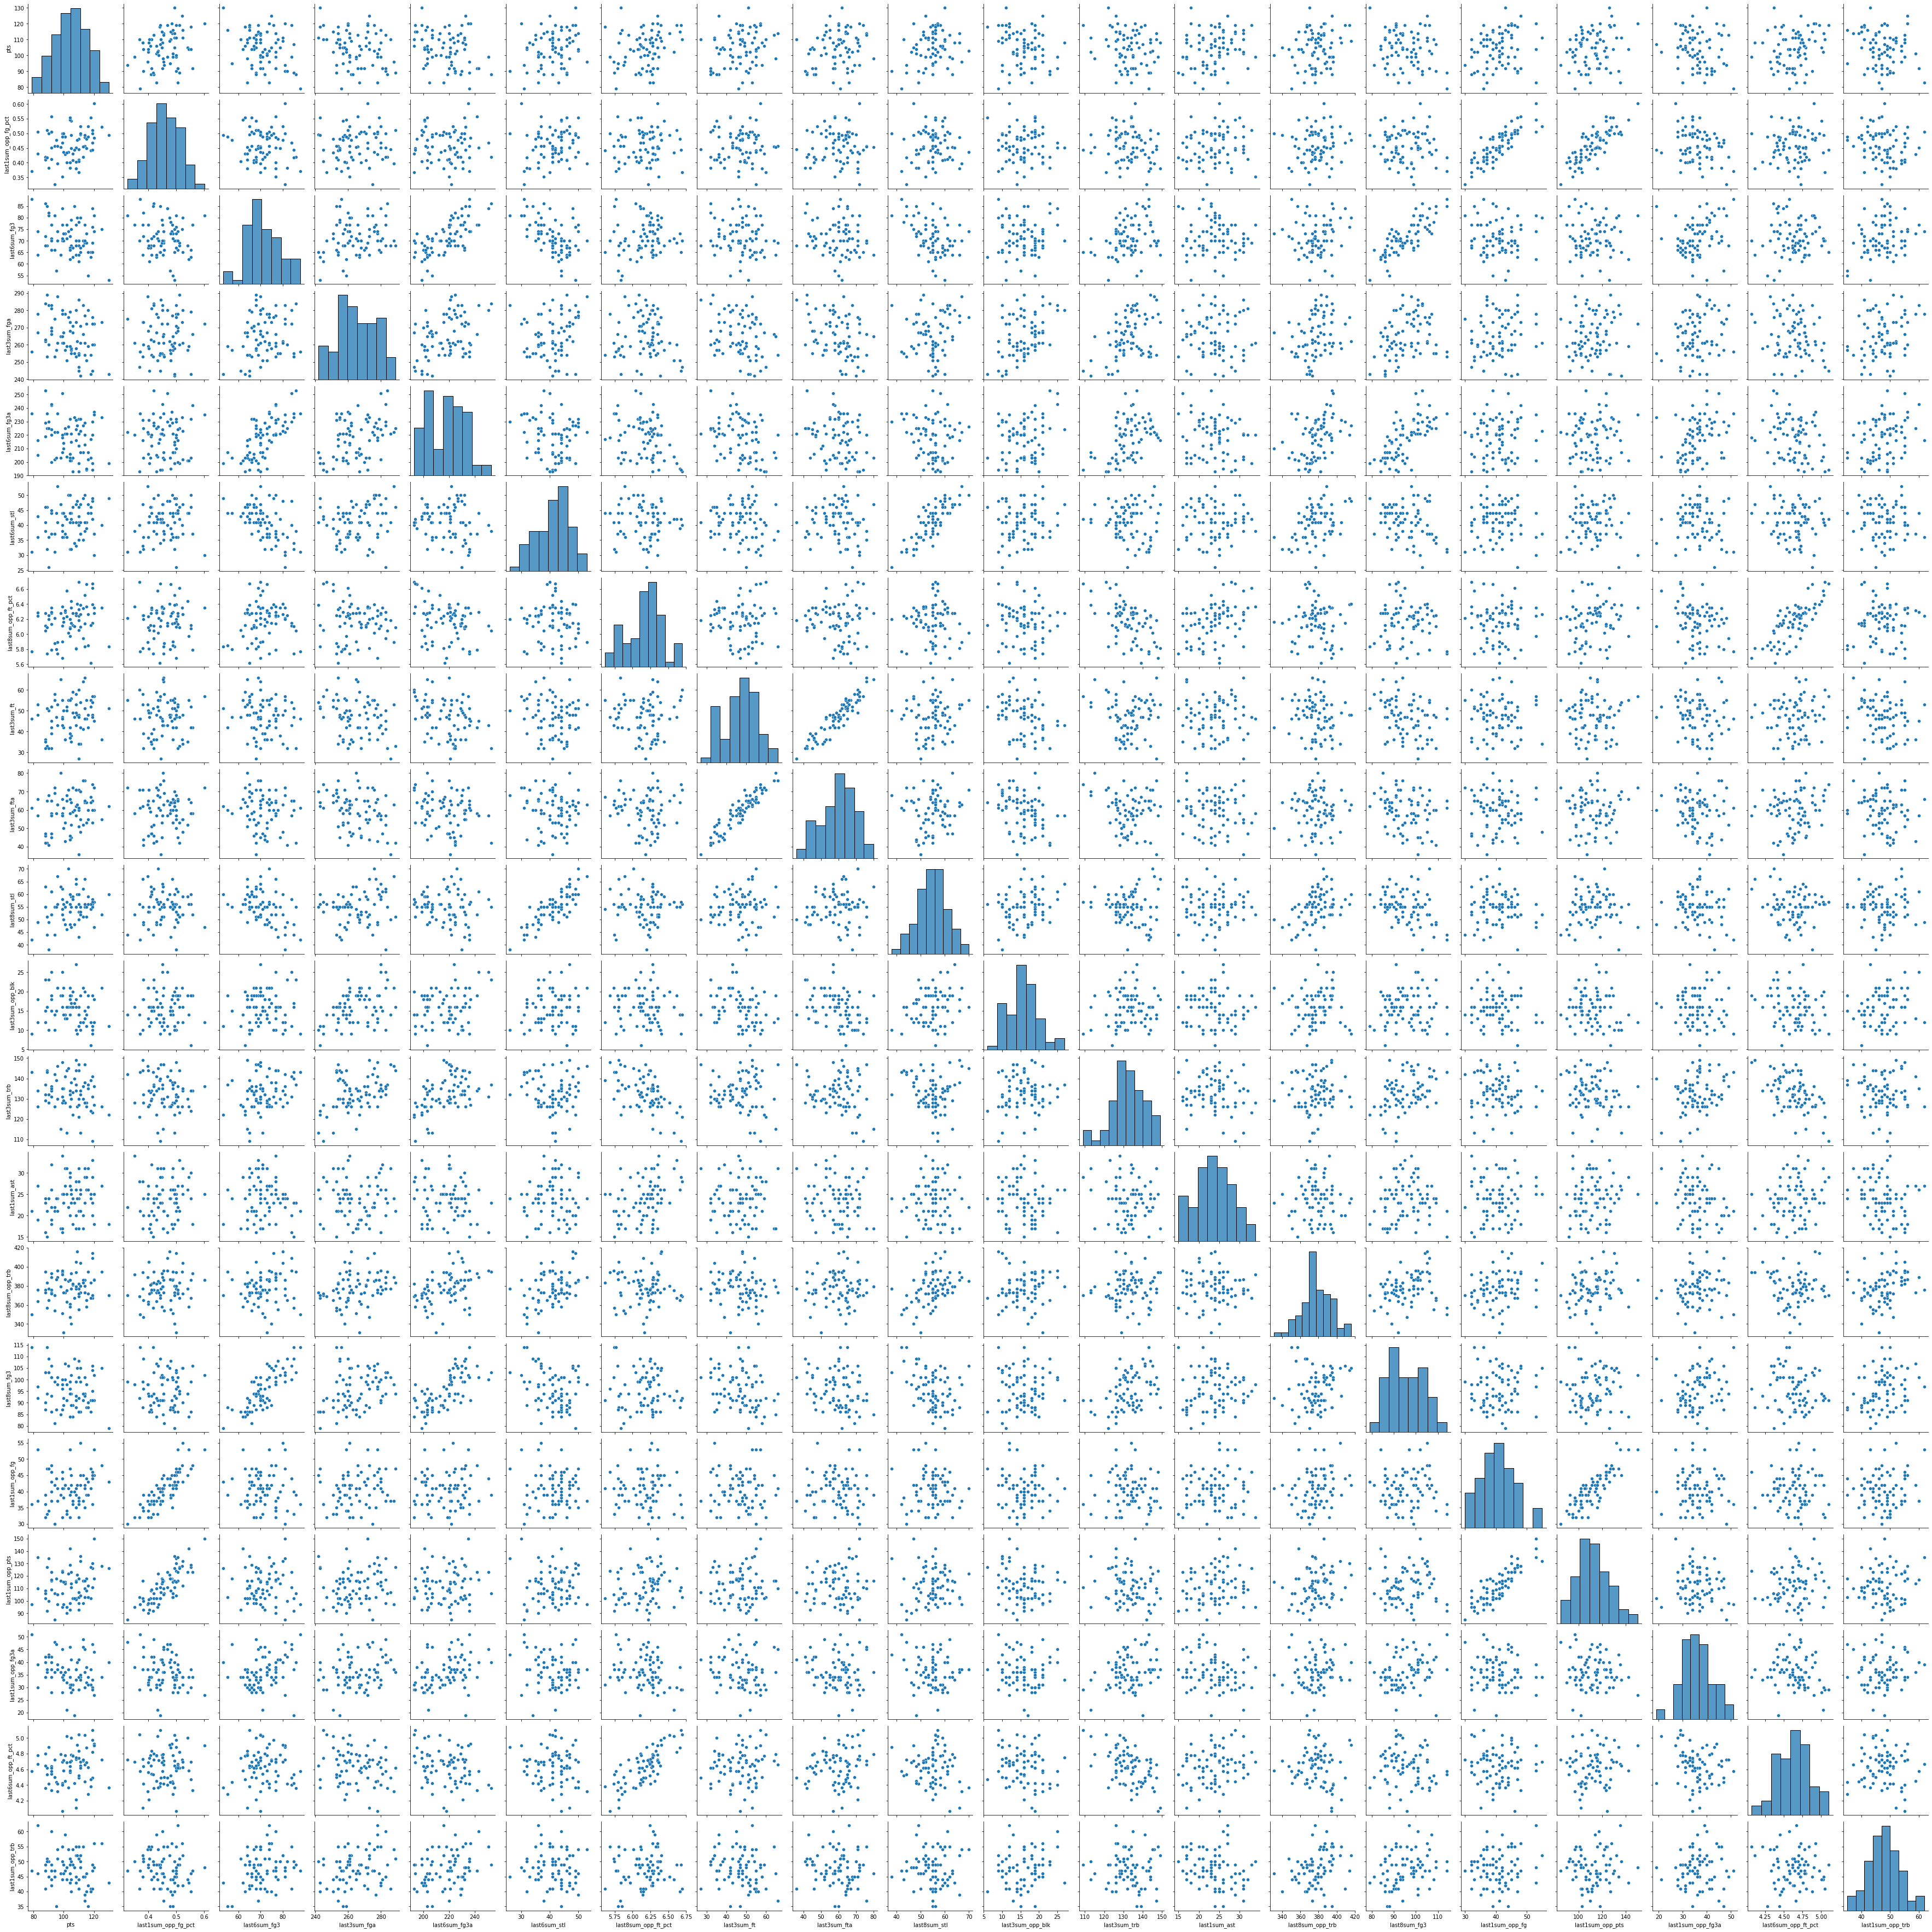

In [129]:
#pairplot of the data
sns.pairplot(team1[(abs(team1.corr()['pts']).sort_values(ascending = False)[:20]).reset_index()['index']]);

''

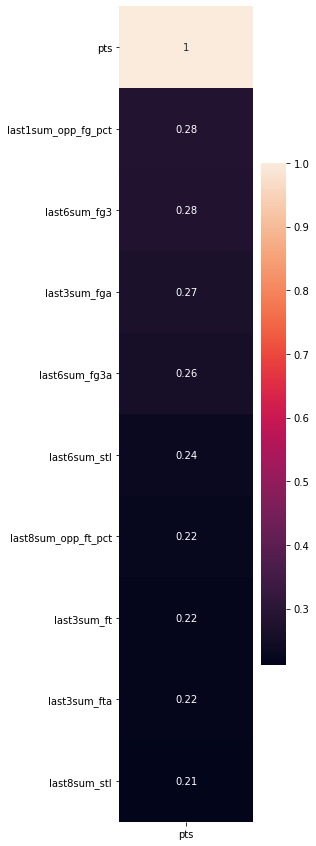

In [130]:
#top 10 correlated variables to points 
plt.figure(figsize = (3, 15))
sns.heatmap((pd.DataFrame(abs(team1.corr()['pts']).sort_values(ascending=False)))[:10],annot=True)

plt.savefig('../data_visuals/team1_points_10_corr_heatmap.jpg');
;


''

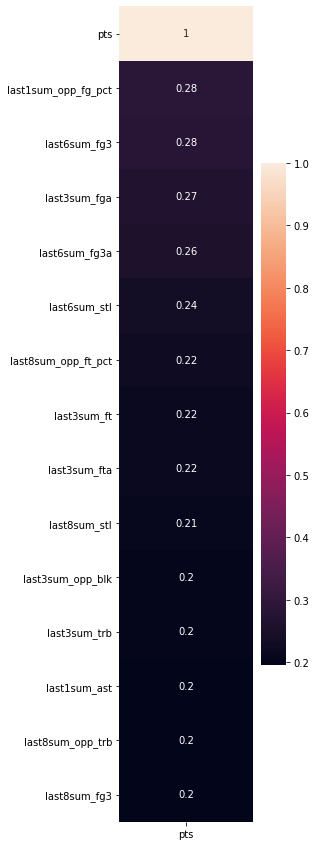

In [131]:
#top 15 correlated variables to points 
plt.figure(figsize = (3, 15))
sns.heatmap((pd.DataFrame(abs(team1.corr()['pts']).sort_values(ascending=False)))[:15],annot=True)


plt.savefig('../data_visuals/team1_points_15_corr_heatmap.jpg');
;


''

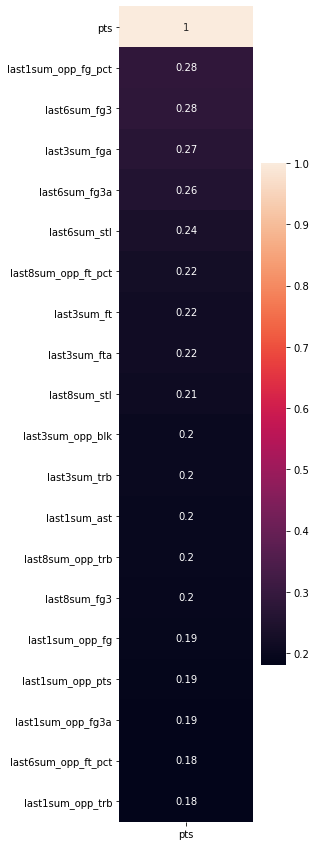

In [132]:
#top 20 correlated variables to points 
plt.figure(figsize = (3, 15))
sns.heatmap((pd.DataFrame(abs(team1.corr()['pts']).sort_values(ascending=False)))[:20],annot=True)


plt.savefig('../data_visuals/team1_points_15_corr_heatmap.jpg');
;


##### Team 2 (away)
---

''

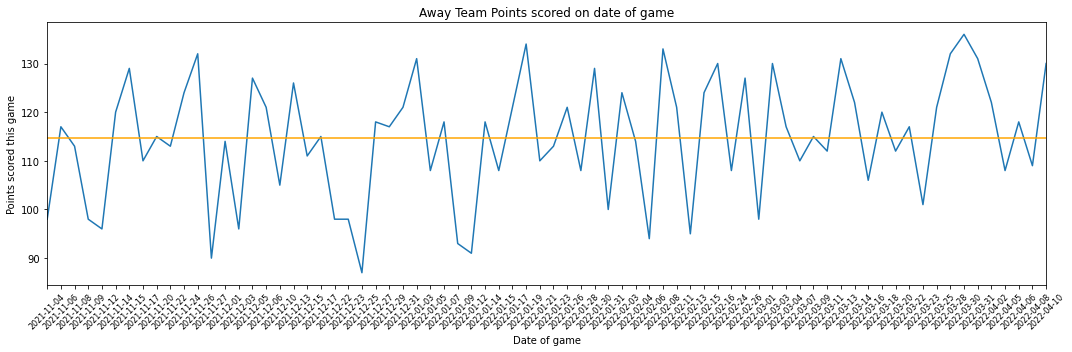

In [133]:
#line graph of points scored
plt.figure(figsize = (15, 5))
plt.plot(team2['date_game'],team2['pts'])
plt.axhline(team2['pts'].mean(),color='orange')
plt.xticks(fontsize=8,rotation=45);
plt.title('Away Team Points scored on date of game')
plt.xlim(team2['date_game'].index[-1],team2['date_game'].index[0])
plt.xlabel('Date of game')
plt.ylabel('Points scored this game')

plt.tight_layout()
plt.savefig('../data_visuals/team2_points_scored_date_game.jpg');
;

In [134]:
#top 10 points scored 
team2[['date_game','pts']].sort_values(by='pts',ascending=False)[:10]

,date_game,pts
6,2022-03-30,136
38,2022-01-19,134
28,2022-02-08,133
62,2021-11-26,132
7,2022-03-28,132
15,2022-03-13,131
46,2022-01-03,131
5,2022-03-31,131
0,2022-04-10,130
20,2022-03-03,130


In [135]:
#lowest 10 points scored
team2[['date_game','pts']].sort_values(by='pts',ascending=True)[:10]

,date_game,pts
50,2021-12-25,87
61,2021-11-27,90
42,2022-01-12,91
43,2022-01-09,93
29,2022-02-06,94
26,2022-02-13,95
69,2021-11-12,96
59,2021-12-03,96
73,2021-11-04,98
21,2022-03-01,98


''

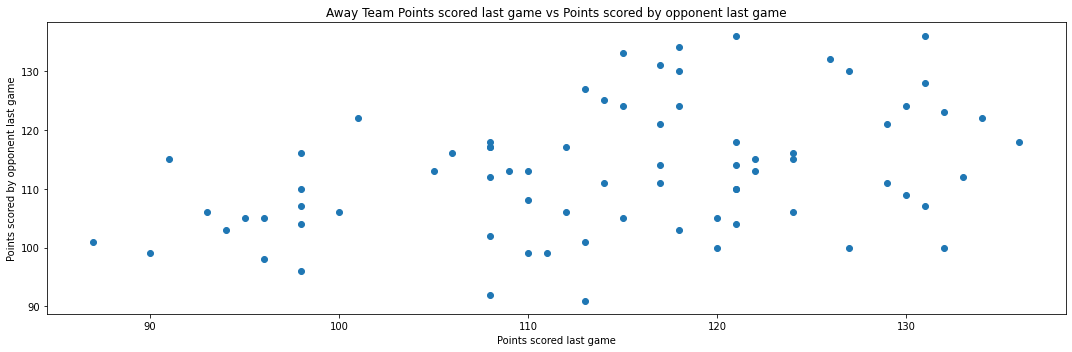

In [136]:
#scatter plot of points last game vs opponents points last game
plt.figure(figsize = (15, 5))
plt.scatter(team2['last1sum_pts'],team2['last1sum_opp_pts'])
plt.title('Away Team Points scored last game vs Points scored by opponent last game')
plt.xlabel('Points scored last game')
plt.ylabel('Points scored by opponent last game')

plt.tight_layout()
plt.savefig('../data_visuals/team2_last_game_points_vs_opponent_points.jpg');
;

''

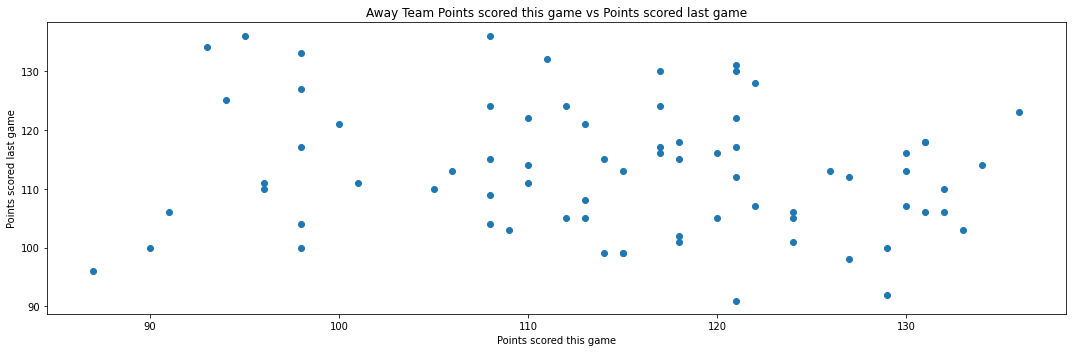

In [137]:
#scatter plot of points this game vs opponents points last game
plt.figure(figsize = (15, 5))
plt.scatter(team2['pts'],team2['last1sum_opp_pts'])
plt.title('Away Team Points scored this game vs Points scored last game')
plt.xlabel('Points scored this game')
plt.ylabel('Points scored last game')

plt.tight_layout()
plt.savefig('../data_visuals/team2_points_scored_vs_last_game_points.jpg');
;

''

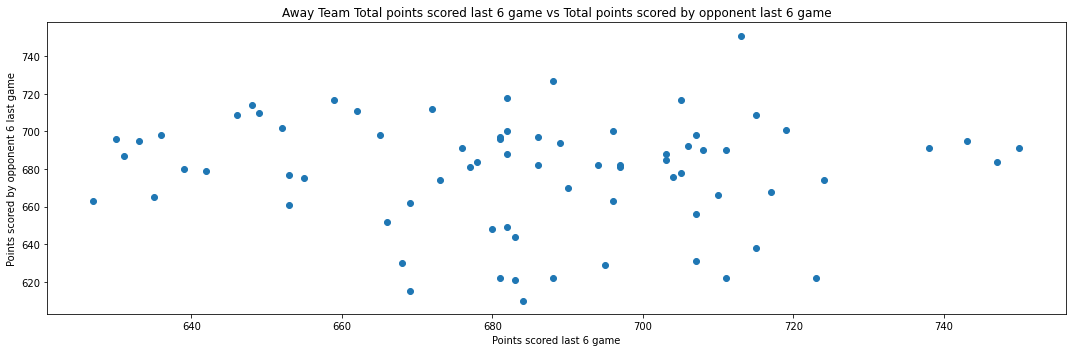

In [138]:
#scatter plot of total points vs total opponents points last 6 game
plt.figure(figsize = (15, 5))
plt.scatter(team2['last6sum_pts'],team2['last6sum_opp_pts'])
plt.title('Away Team Total points scored last 6 game vs Total points scored by opponent last 6 game')
plt.xlabel('Points scored last 6 game')
plt.ylabel('Points scored by opponent 6 last game')

plt.tight_layout()
plt.savefig('../data_visuals/team2_last_6_games_points_vs_opponent_points.jpg');
;

''

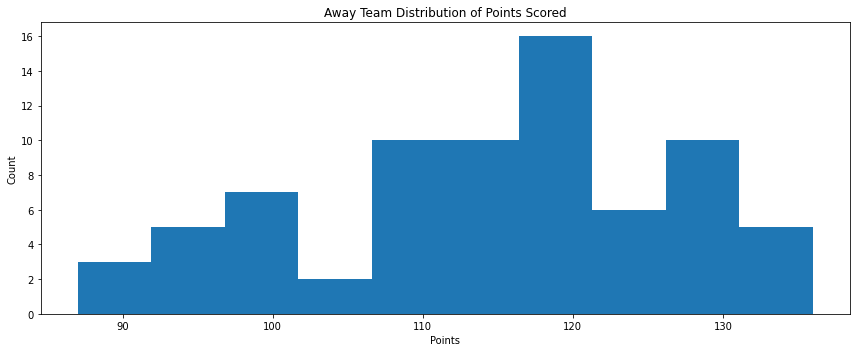

In [139]:
#histogram of points scored
plt.figure(figsize=(12,5))
plt.hist(team2['pts'])
plt.title('Away Team Distribution of Points Scored')
plt.xlabel('Points')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../data_visuals/team2_points_scored_distribution.jpg');
;

''

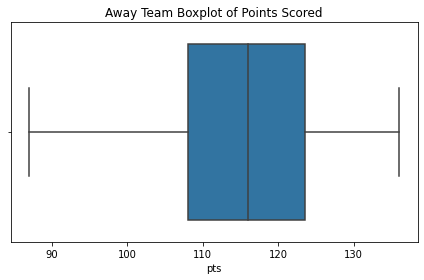

In [140]:
#boxplot of points scored
sns.boxplot(data=team2['pts'],x=team2['pts']).set(title='Away Team Boxplot of Points Scored')

plt.tight_layout()
plt.savefig('../data_visuals/team2_points_scored_boxplot.jpg');
;

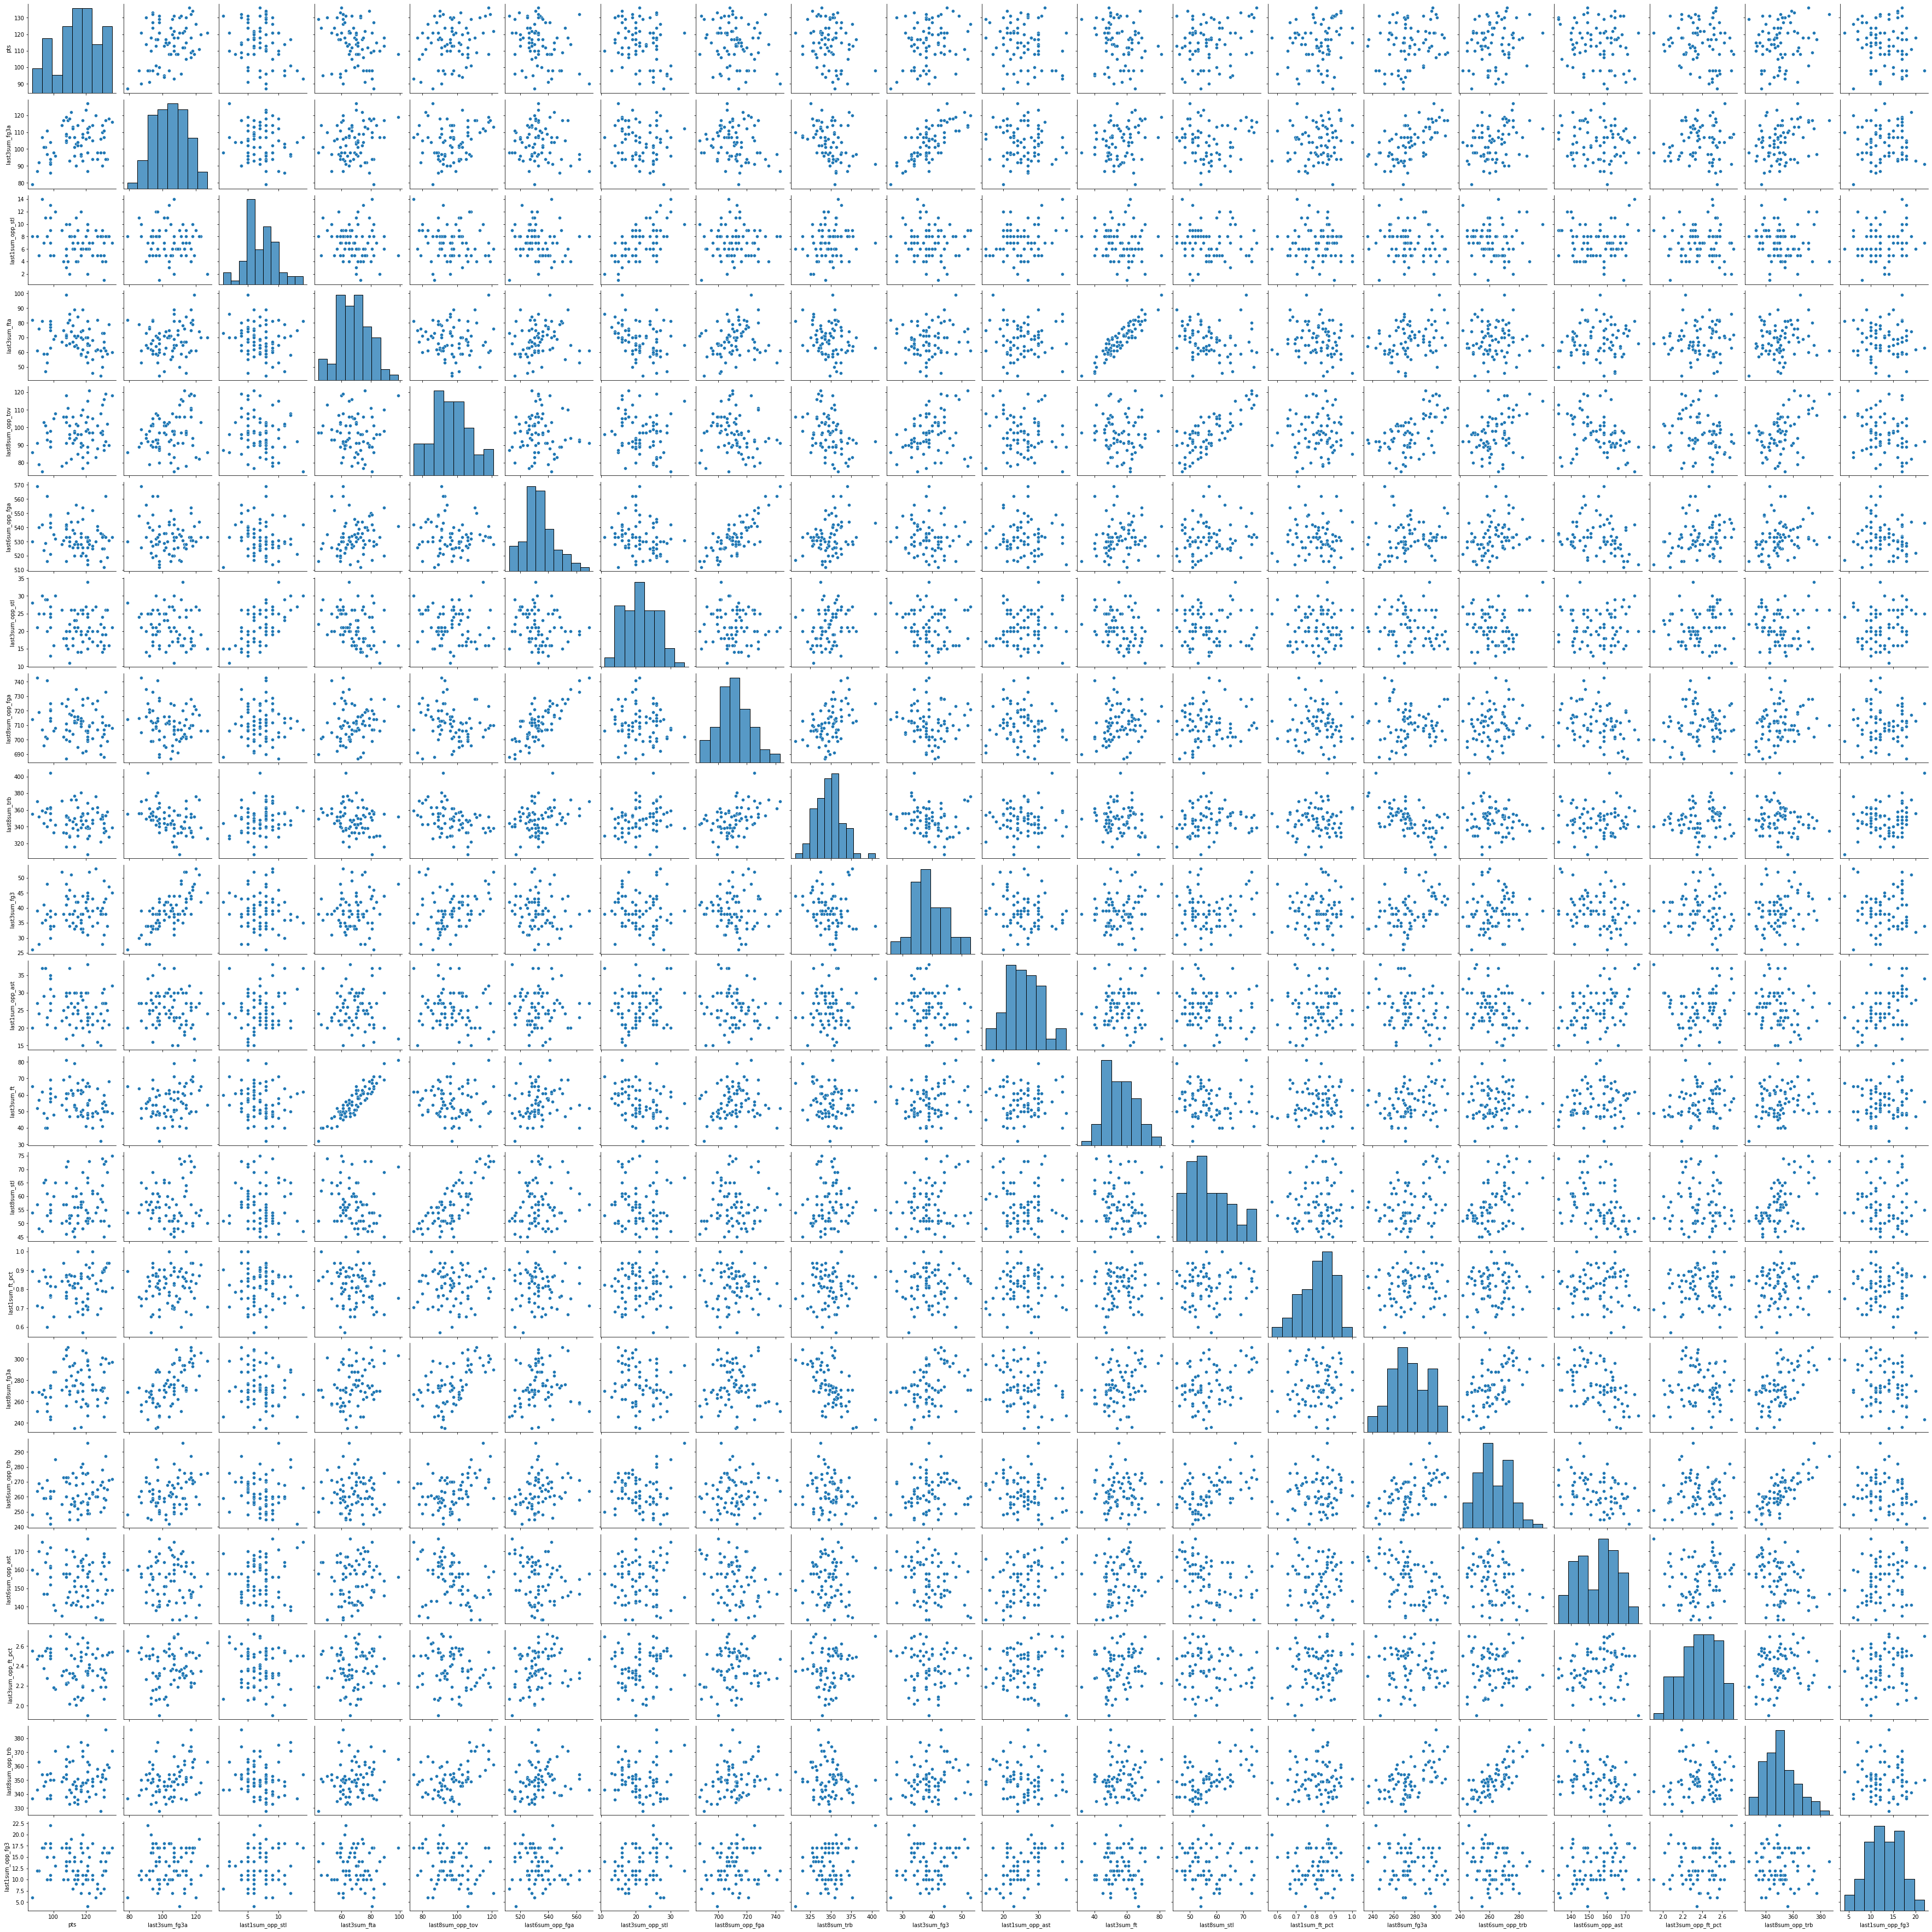

In [141]:
#pairplot of the data
sns.pairplot(team2[(abs(team2.corr()['pts']).sort_values(ascending = False)[:20]).reset_index()['index']]);

''

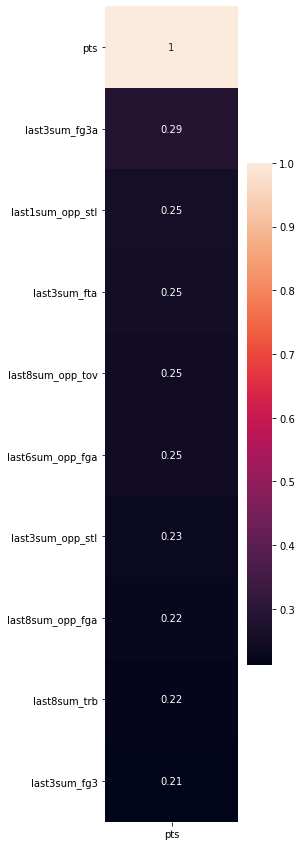

In [142]:
#top 10 correlated variables to points 
plt.figure(figsize = (3, 15))
sns.heatmap((pd.DataFrame(abs(team2.corr()['pts']).sort_values(ascending=False)))[:10],annot=True)

plt.savefig('../data_visuals/team2_points_10_corr_heatmap.jpg');
;


''

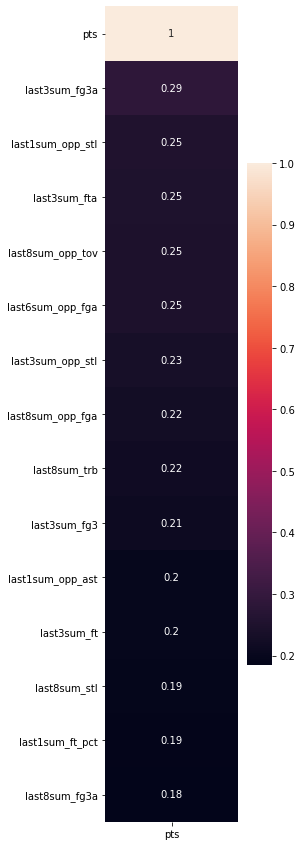

In [143]:
#top 15 correlated variables to points 
plt.figure(figsize = (3, 15))
sns.heatmap((pd.DataFrame(abs(team2.corr()['pts']).sort_values(ascending=False)))[:15],annot=True)


plt.savefig('../data_visuals/team2_points_15_corr_heatmap.jpg');
;


''

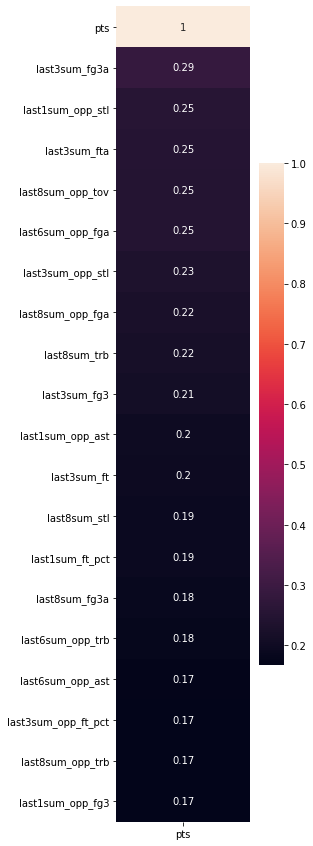

In [144]:
#top 20 correlated variables to points 
plt.figure(figsize = (3, 15))
sns.heatmap((pd.DataFrame(abs(team2.corr()['pts']).sort_values(ascending=False)))[:20],annot=True)


plt.savefig('../data_visuals/team2_points_15_corr_heatmap.jpg');
;


---